In [4]:
import pandas as pd
from datetime import datetime

# Load data
raw_data = pd.read_csv('data/raw_data.csv')
inc_data = pd.read_csv('data/inc_data.csv')

# Transformation 1: Handle missing values
print("Before handling missing values:")
print(raw_data.isna().sum())

# Fill numeric missing values with median
numeric_cols = raw_data.select_dtypes(include=['number']).columns
raw_data[numeric_cols] = raw_data[numeric_cols].fillna(raw_data[numeric_cols].median())

# Fill categorical missing values with mode
categorical_cols = raw_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    raw_data[col] = raw_data[col].fillna(raw_data[col].mode()[0])

print("\nAfter handling missing values:")
print(raw_data.isna().sum())

# Transformation 2: Remove duplicates
print("\nBefore removing duplicates:", len(raw_data))
raw_data = raw_data.drop_duplicates()
print("After removing duplicates:", len(raw_data))

# Transformation 3: Create new calculated column
if 'quantity' in raw_data.columns and 'unit_price' in raw_data.columns:
    raw_data['total_price'] = raw_data['quantity'] * raw_data['unit_price']
    print("\nAdded total_price column:")
    print(raw_data[['quantity', 'unit_price', 'total_price']].head())

# Transformation 4: Convert date strings to datetime
date_cols = [col for col in raw_data.columns if 'date' in col.lower()]
for col in date_cols:
    raw_data[col] = pd.to_datetime(raw_data[col], errors='coerce')
    print(f"\nConverted {col} to datetime:")
    print(raw_data[col].head())

# Apply same transformations to incremental data
# (Repeat similar transformations for inc_data)

# Save transformed data to csv file
inc_data.to_csv(r"c:\Users\flags\OneDrive\Desktop\DSA 2040 MID-SEM\Transformed\transformed_incremental.csv", index=False)
# Save the raw data to CSV file
raw_data.to_csv(r"C:\Users\flags\OneDrive\Desktop\DSA 2040 MID-SEM\Transformed\transformed_full.csv", index=False)


Before handling missing values:
order_id          0
customer_name     1
product           0
quantity         26
unit_price       35
order_date        1
region           25
dtype: int64

After handling missing values:
order_id         0
customer_name    0
product          0
quantity         0
unit_price       0
order_date       0
region           0
dtype: int64

Before removing duplicates: 100
After removing duplicates: 99

Added total_price column:
   quantity  unit_price  total_price
0       2.0       500.0       1000.0
1       2.0       500.0       1000.0
2       2.0       250.0        500.0
3       2.0       750.0       1500.0
4       3.0       500.0       1500.0

Converted order_date to datetime:
0   2024-01-20
1   2024-04-29
2   2024-01-08
3   2024-01-07
4   2024-03-07
Name: order_date, dtype: datetime64[ns]


C:\Users\flags\AppData\Local\Temp\ipykernel_12212\4198381834.py:38: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  raw_data[col] = pd.to_datetime(raw_data[col], errors='coerce')



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 3.3 MB/s eta 0:00:03
   ------ --------------------------------- 1.3/8.1 MB 2.9 MB/s eta 0:00:03
   --------- ------------------------------ 1.8/8.1 MB 2.4 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/8.1 MB 2.9 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/8.1 MB 3.2 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/8.1 MB 3.1 MB/s eta 0:00:02
   ------------------------ --------------- 5.0/8.1 MB 3.2 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.1 MB 3.1 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.1 MB 2.6 MB/s eta 0:00:01
   --------------------------- ----

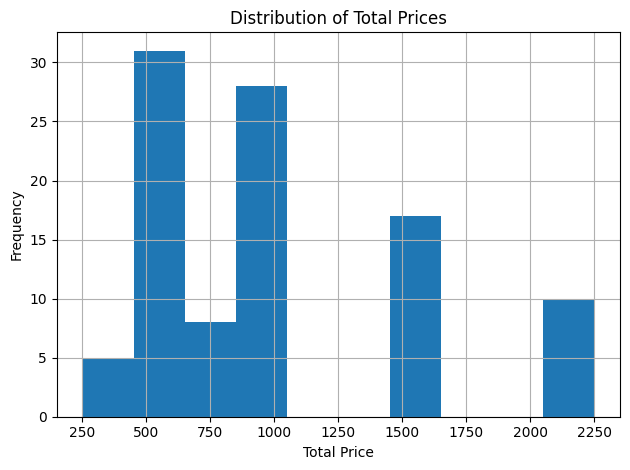

In [11]:
%pip install matplotlib
import matplotlib.pyplot as plt

# Plot histogram of total_price column
raw_data['total_price'].hist()
plt.title('Distribution of Total Prices')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('price_distribution.png')
plt.show()

In [13]:
# Text cleaning for description fields
if 'description' in raw_data.columns:
	raw_data['description'] = raw_data['description'].str.lower().str.strip()
else:
	print("Column 'description' not found in raw_data.")

Column 'description' not found in raw_data.
